# NeRF Activation Sparsity
Run the `accelerating_nerfs/nerf_activation_sparsity.py` script to compute the sparsities. You need to use the NeRF environment for that.

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from notebook_utils import load_mpl_style

load_mpl_style()

In [2]:
!ls | grep volrend

2023-05-03_18-13-41_volrend_sparsity.json


In [3]:
sparsity_results_path = "2023-05-03_18-13-41_volrend_sparsity.json"
with open(sparsity_results_path, "r") as f:
    sparsity_results = json.load(f)

print(f"Loaded sparsity results for {sparsity_results.keys()}")

Loaded sparsity results for dict_keys(['chair', 'drums', 'ficus', 'hotdog', 'lego', 'materials', 'mic', 'ship'])


In [4]:
processed_results = defaultdict(dict)
sparsity_key = 'avg_weights_sparsity'
sparsity_std_key = 'std_weights_sparsity'

for scene, results in sparsity_results.items():
    processed_results[scene] = {
        "sparsity": results[sparsity_key],
        "std": results[sparsity_std_key] if sparsity_std_key else None
    }

## Plot volumetric rendering weight sparsity for each scene

In [5]:
df = pd.DataFrame.from_dict(processed_results, orient="index")
df.head()

,sparsity,std
chair,0.372917,0.256707
drums,0.438331,0.258318
ficus,0.524542,0.253974
hotdog,0.317997,0.251891
lego,0.385306,0.217825


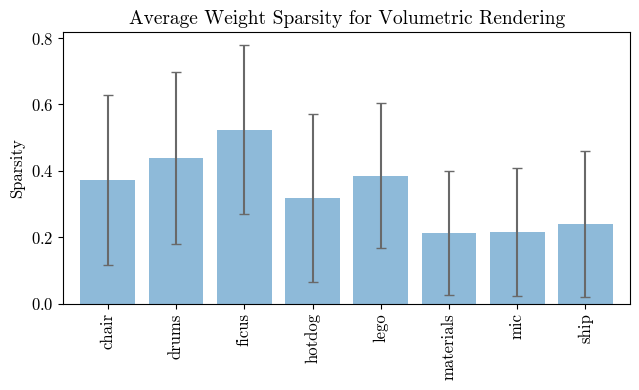

In [8]:
fig_dir = "figures/volrend"
os.makedirs(fig_dir, exist_ok=True)

err = df["std"]
ax = df.plot.bar(
    y="sparsity", yerr=err, width=0.8, figsize=(6.5, 4),
    align='center', alpha=0.5, ecolor='dimgray', capsize=3.5
)
# ax.set_xlabel("Scene")
ax.set_ylabel("Sparsity")
ax.get_legend().remove()
ax.set_title("Average Weight Sparsity for Volumetric Rendering")
ax.figure.tight_layout()
ax.figure.savefig(f"{fig_dir}/volrend_weight_sparsity.pdf")    

In [7]:
print("Overall mean weight sparsity across scenes:", df["sparsity"].mean())

Overall mean weight sparsity across scenes: 0.33840320646341765
